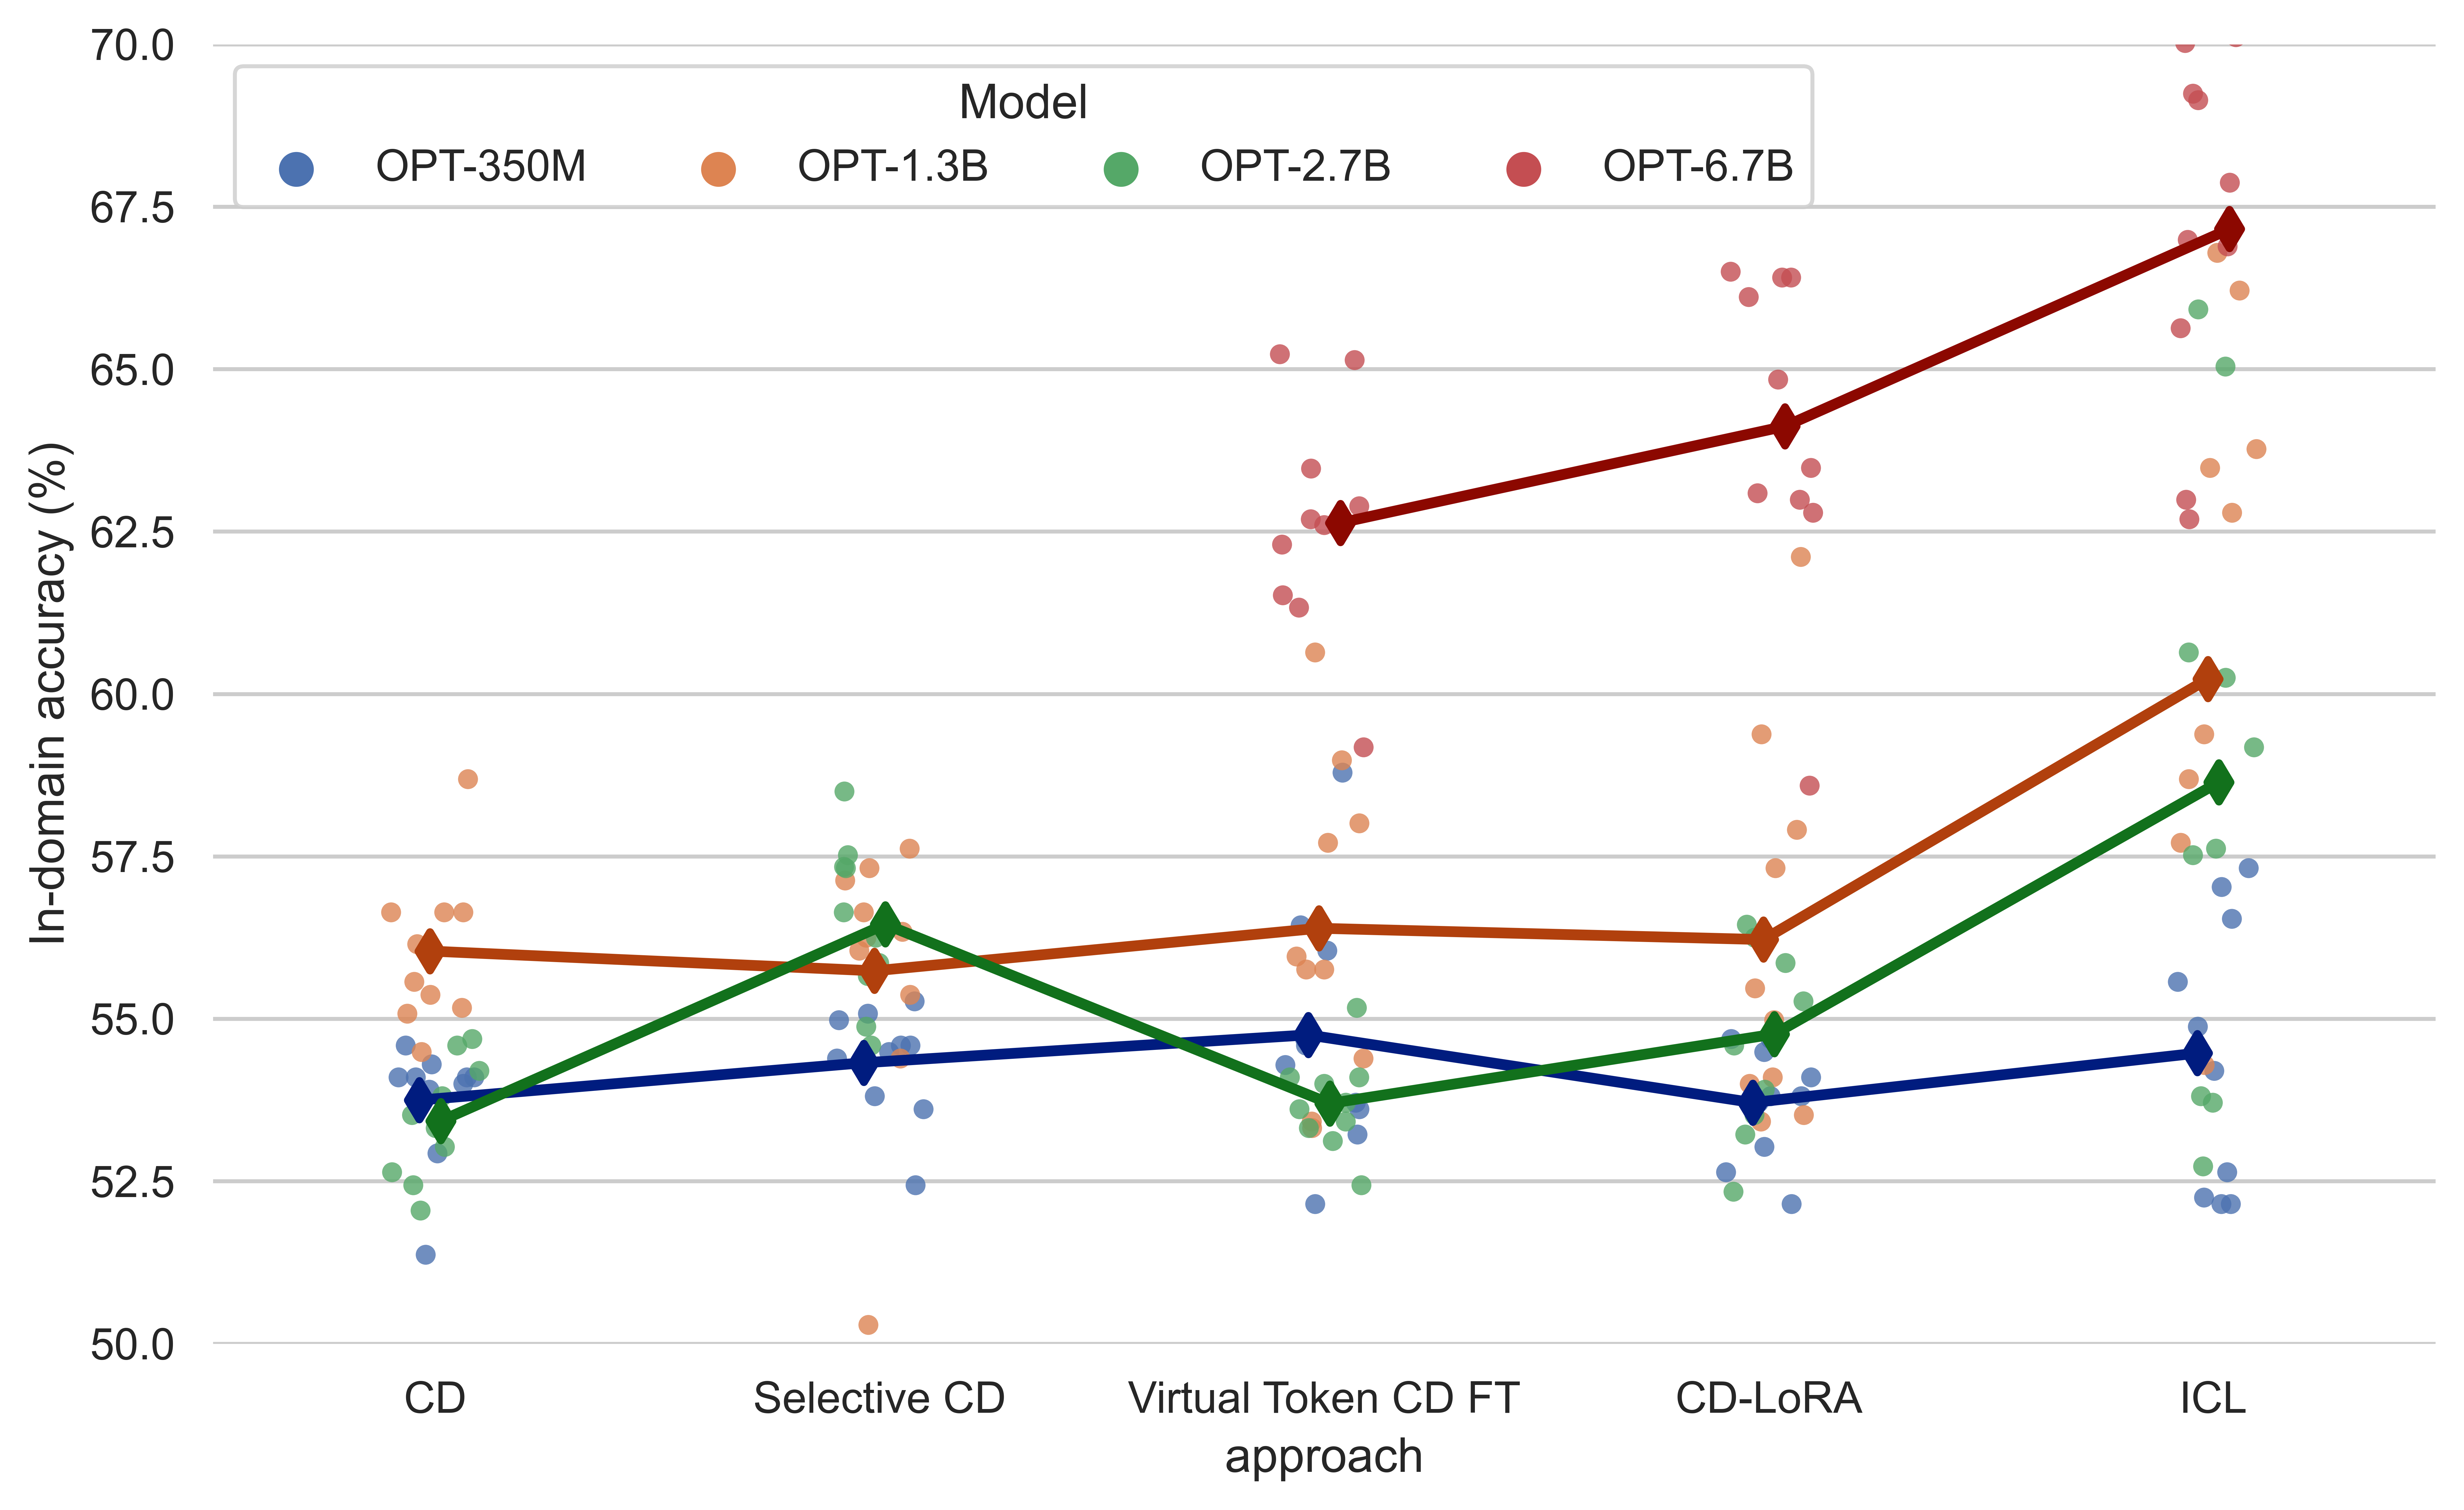

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')
df['id_accuracy'] = df['id_accuracy'].str.replace(',', '.').astype(float)

sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 6))
sns.despine(bottom=True, left=True)

strip = sns.stripplot(
    data=df, 
    x="approach", 
    y="id_accuracy", 
    hue="model",
    dodge=False, 
    alpha=.8, 
    zorder=1
)

point = sns.pointplot(
    data=df, 
    x="approach", 
    y="id_accuracy", 
    hue="model",
    dodge=.8 - .8 / 1.1, 
    palette="dark", 
    ci=None,
    markers="d", 
    markersize=4, 
    linestyle=None
)

plt.ylabel("In-domain accuracy (%)")

# rename x-axis labels
plt.xticks([0, 1, 2, 3, 4], ['CD', 'Selective CD', 'Virtual Token CD FT', 'CD-LoRA', 'ICL'])


handles, labels = ax.get_legend_handles_labels()
unique_labels = labels[:int(len(labels)/2)]  # Assuming labels are duplicated
unique_handles = handles[:int(len(handles)/2)]  # Adjust handles similarly
ax.legend(unique_handles, unique_labels, title="Model", loc="upper left", ncol=4, frameon=True)

plt.ylim(50, 70)
plt.rcParams["figure.dpi"] = 1000 
plt.rcParams["savefig.dpi"] = 1000 

plt.show()
